<a href="https://colab.research.google.com/github/mafaves/AI-projects/blob/main/MIA_TFM2_Marcos_Aguilella_Fabregat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cuaderno creado por Marcos Aguilella Fabregat

## Framingham Heart Study-Cohort (FHS-Cohort)
En este proyecto emplearemos el [dataset Framingham](https://biolincc.nhlbi.nih.gov/studies/framcohort/) cuyo objetivo es el estudio de la incidencia y prevalencia de las enfermedades coronarias.
Puedes descargar el fichero CSV [pinchando aquí](https://https://drive.google.com/file/d/1YNP9ObQBcLYSS-W2OeCaraPqvETiOoCS/view?usp=sharing).
A continuación tienes una descripción de las variables incluidas en este conjunto de datos.

:
**Demographic**
* **Sex**: male or female(Nominal)
* **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
* **Current Smoker**: whether or not the patient is a current smoker (Nominal)
* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
* **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)

**Medical(current)**
* **Tot Chol**: total cholesterol level (Continuous)
* **Sys BP**: systolic blood pressure (Continuous)
* **Dia BP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)

**Predict variable (desired target)**
* 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

# Tarea 1.
## Realiza una exploración del conjunto de datos utilizando métodos de la librería Pandas para cargar, filtrar y listar tablas de datos.

In [ ]:
#pip install ptitprince

In [ ]:
#pip install lazypredict

In [ ]:
#pip install researchpy

In [ ]:
#pip install scikit-optimize

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid") # muestra la cuadrícula de posición en los gráficos
import matplotlib.pyplot as plt
from rich.console import Console
from google.colab import drive
from scipy import stats
from scipy.stats import spearmanr, pointbiserialr
from scipy.stats import chi2_contingency
import copy
import ptitprince as pt

#imputación
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge, Ridge

#regresión logística
from statsmodels.tools import add_constant
import statsmodels.api as sm

##Optimización modelo ML

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from skopt.searchcv import BayesSearchCV

## Modelo ML
from lazypredict.Supervised import LazyClassifier
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

## Balanceo de la clase objetivo
from imblearn.over_sampling import SMOTE

# warnings
import warnings


console = Console()





In [ ]:
# Montar Google Drive
drive.mount('/content/drive')
# Ruta del archivo en Google Drive
ruta_archivo = '/content/drive/MyDrive/Colab_Notebooks/master/heart_disease.csv'

# Cargar el archivo usando pandas
df = pd.read_csv(ruta_archivo)

# Mostrar los primeros registros
df.head()

Mounted at /content/drive


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.00,0,0.00,0.00,0,0,0,195.00,106.00,70.00,26.97,80.00,77.00,0
1,0,46,2.00,0,0.00,0.00,0,0,0,250.00,121.00,81.00,28.73,95.00,76.00,0
2,1,48,1.00,1,20.00,0.00,0,0,0,245.00,127.50,80.00,25.34,75.00,70.00,0
3,0,61,3.00,1,30.00,0.00,0,1,0,225.00,150.00,95.00,28.58,65.00,103.00,1
4,0,46,3.00,1,23.00,0.00,0,0,0,285.00,130.00,84.00,23.10,85.00,85.00,0


In [ ]:
df.shape

(4238, 16)

Se comprueba que el conjunto de datos contiene todas las variables mencionadas anteriormente:

In [ ]:
df.columns


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

Como se puede observar, algunas variables no tienen bien definido el tipo, al ser definidas como numéricas cuando son binarias. Procedemos a cambiar el tipo de variable:

In [ ]:
# Convertir columnas a su tipo correcto
df['male'] = df['male'].astype('category')
df['education'] = df['education'].astype('category')
df['currentSmoker'] = df['currentSmoker'].astype('category')
df['BPMeds'] = df['BPMeds'].astype('category')
df['prevalentStroke'] = df['prevalentStroke'].astype('category')
df['prevalentHyp'] = df['prevalentHyp'].astype('category')
df['diabetes'] = df['diabetes'].astype('category')
df['TenYearCHD'] = df['TenYearCHD'].astype('category')


# Comprobación
df.dtypes

male               category
age                   int64
education          category
currentSmoker      category
cigsPerDay          float64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
TenYearCHD         category
dtype: object

In [ ]:
### 2. Eliminación de Duplicados
number_of_duplicates = df.duplicated().sum()
print(f"Número de entradas duplicadas: {number_of_duplicates}")

Número de entradas duplicadas: 0


# TAREA 3
## Si lo estimas necesario, ejecuta métodos de imputación y normalización de datos explicando explicando brevemente tus decisiones.

## Missin values

In [ ]:
missing_values = pd.DataFrame({'Null_count':df.isna().sum(),'%_of_null_values':(df.isnull().sum()/df.shape[0])*100})
missing_values

,Null_count,%_of_null_values
male,0,0.00
age,0,0.00
education,105,2.48
currentSmoker,0,0.00
cigsPerDay,29,0.68
BPMeds,53,1.25
prevalentStroke,0,0.00
prevalentHyp,0,0.00
diabetes,0,0.00
totChol,50,1.18


<Axes: >

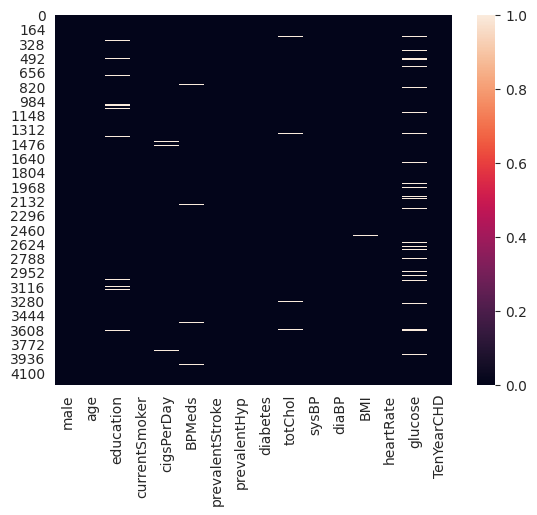

In [ ]:
sns.heatmap(df.isna(),)

Para lidiar con los valores nulos de este dataset se ha optado por usar estimadores. En concreto, el estimador 'IterativeImputer' de Scikit-learn. Dentro del mismo, el estimador escogido fue ['BayesianRidg()'](https://github.com/scikit-learn/scikit-learn/blob/main/examples/impute/plot_iterative_imputer_variants_comparison.py)

Este método de imputación, en lugar de simplemente rellenar los valores faltantes con una única estimación, realiza múltiples pasadas para mejorar la calidad de las estimaciones utilizando un enfoque bayesiano para la regresión. Esto puede ser beneficioso, especialmente cuando hay dependencias complejas entre las variables.

In [ ]:
# Initialize IterativeImputer
imputer = IterativeImputer(max_iter=50, random_state=10, estimator= BayesianRidge() ,verbose=True)

# Fit and transform the DataFrame to impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Display information about missing values after imputation
print("\nValores nulos después de la imputación:")
print(df_imputed.isnull().sum())

[IterativeImputer] Completing matrix with shape (4238, 16)
[IterativeImputer] Change: 104.99571063645853, scaled tolerance: 0.6960000000000001 
[IterativeImputer] Change: 0.6286519972155276, scaled tolerance: 0.6960000000000001 
[IterativeImputer] Early stopping criterion reached.

Valores nulos después de la imputación:
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


Una vez hemos rellanado los valores nulos con valores imputados, proseguiremos con la descripción y visualización de los datos. Para llevar a cabo la descripción de los datos y su visualización, vamos a separar los datos en 2 dataframes: uno que contiene los datos numéricos y otro los binarios:

In [ ]:
df_num = df_imputed.drop(columns=['male', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD'])
df_binary = df_imputed[['male', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD' ]]
df_binary = df_binary.astype('category')

In [ ]:
# Resumen de datos numéricos
summary = df_num.describe()

# Mediana
median = df_num.median()
# Moda
mode = df.mode().iloc[0]

#Unimos la mediana y la moda al resumen
summary.loc['median'] = median
summary.loc['mode'] = mode


#summary.to_csv('summary_numerical_results.csv', index=True)
# Mostramos el resumen
summary

,age,education,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.00,4238.00,4238.00,4238.00,4238.00,4238.00,4238.00,4238.00,4238.00,4238.00
mean,49.58,1.98,9.06,0.03,236.78,132.35,82.89,25.80,75.88,81.82
std,8.57,1.01,11.90,0.17,44.35,22.04,11.91,4.07,12.03,23.02
min,32.00,1.00,0.00,-0.03,107.00,83.50,48.00,15.54,44.00,40.00
25%,42.00,1.00,0.00,0.00,206.00,117.00,75.00,23.07,68.00,72.00
50%,49.00,2.00,0.00,0.00,234.00,128.00,82.00,25.38,75.00,78.00
75%,56.00,3.00,20.00,0.00,263.00,144.00,89.88,28.04,83.00,85.65
max,70.00,4.00,70.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00
median,49.00,2.00,0.00,0.00,234.00,128.00,82.00,25.38,75.00,78.00
mode,40.00,1.00,0.00,0.00,240.00,120.00,80.00,22.19,75.00,75.00


In [ ]:
# Resumen de datos binarios
summary_binary = df_binary.describe()
summary_binary


,male,currentSmoker,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
count,4238.00,4238.00,4238.00,4238.00,4238.00,4238.00
unique,2.00,2.00,2.00,2.00,2.00,2.00
top,0.00,0.00,0.00,0.00,0.00,0.00
freq,2419.00,2144.00,4213.00,2922.00,4129.00,3594.00


Podemos comprobar que las variables binarias no tienen errores en su composición ya que todas tienen 2 valores únicos. A destacar:

1. Las variables BPMeds, PrevalentStroke y diabetes están muy desbalanceadas. A continuación, en las gráficas, podremos comprobar dicha diferencia con porcentajes.
2.  La variable objetivo 'TenYearCHD' tiene también datos bastante desbalanceados: 3594/4238 instancias son de valor 0.

# TAREA 2

##Prepara una o más funciones que permitan realizar una exploración visual de los datos más relevantes utilizando las librerías python de tu elección.

Para esta parte del proyecto, se utilizará la función ['RainCloud'](https://github.com/RainCloudPlots/RainCloudPlots) de librería de ['ptitprince'](https://pypi.org/project/ptitprince/) para la visualización de las variables numéricas. Esta función aporta gran cantidad de información en solo una gráfica dado que une la distribución de la variable, la caja de bigotes y los puntos repartidos a lo largo de la misma.


Para las variables binarias, se utilizará la gráfica de 'Countplot' de Seaborn, añadiendo en la misma los porcentajes de cada una, dado que la anterior no tiene mucho sentido al estar hablando de variables con solo 2 valores.

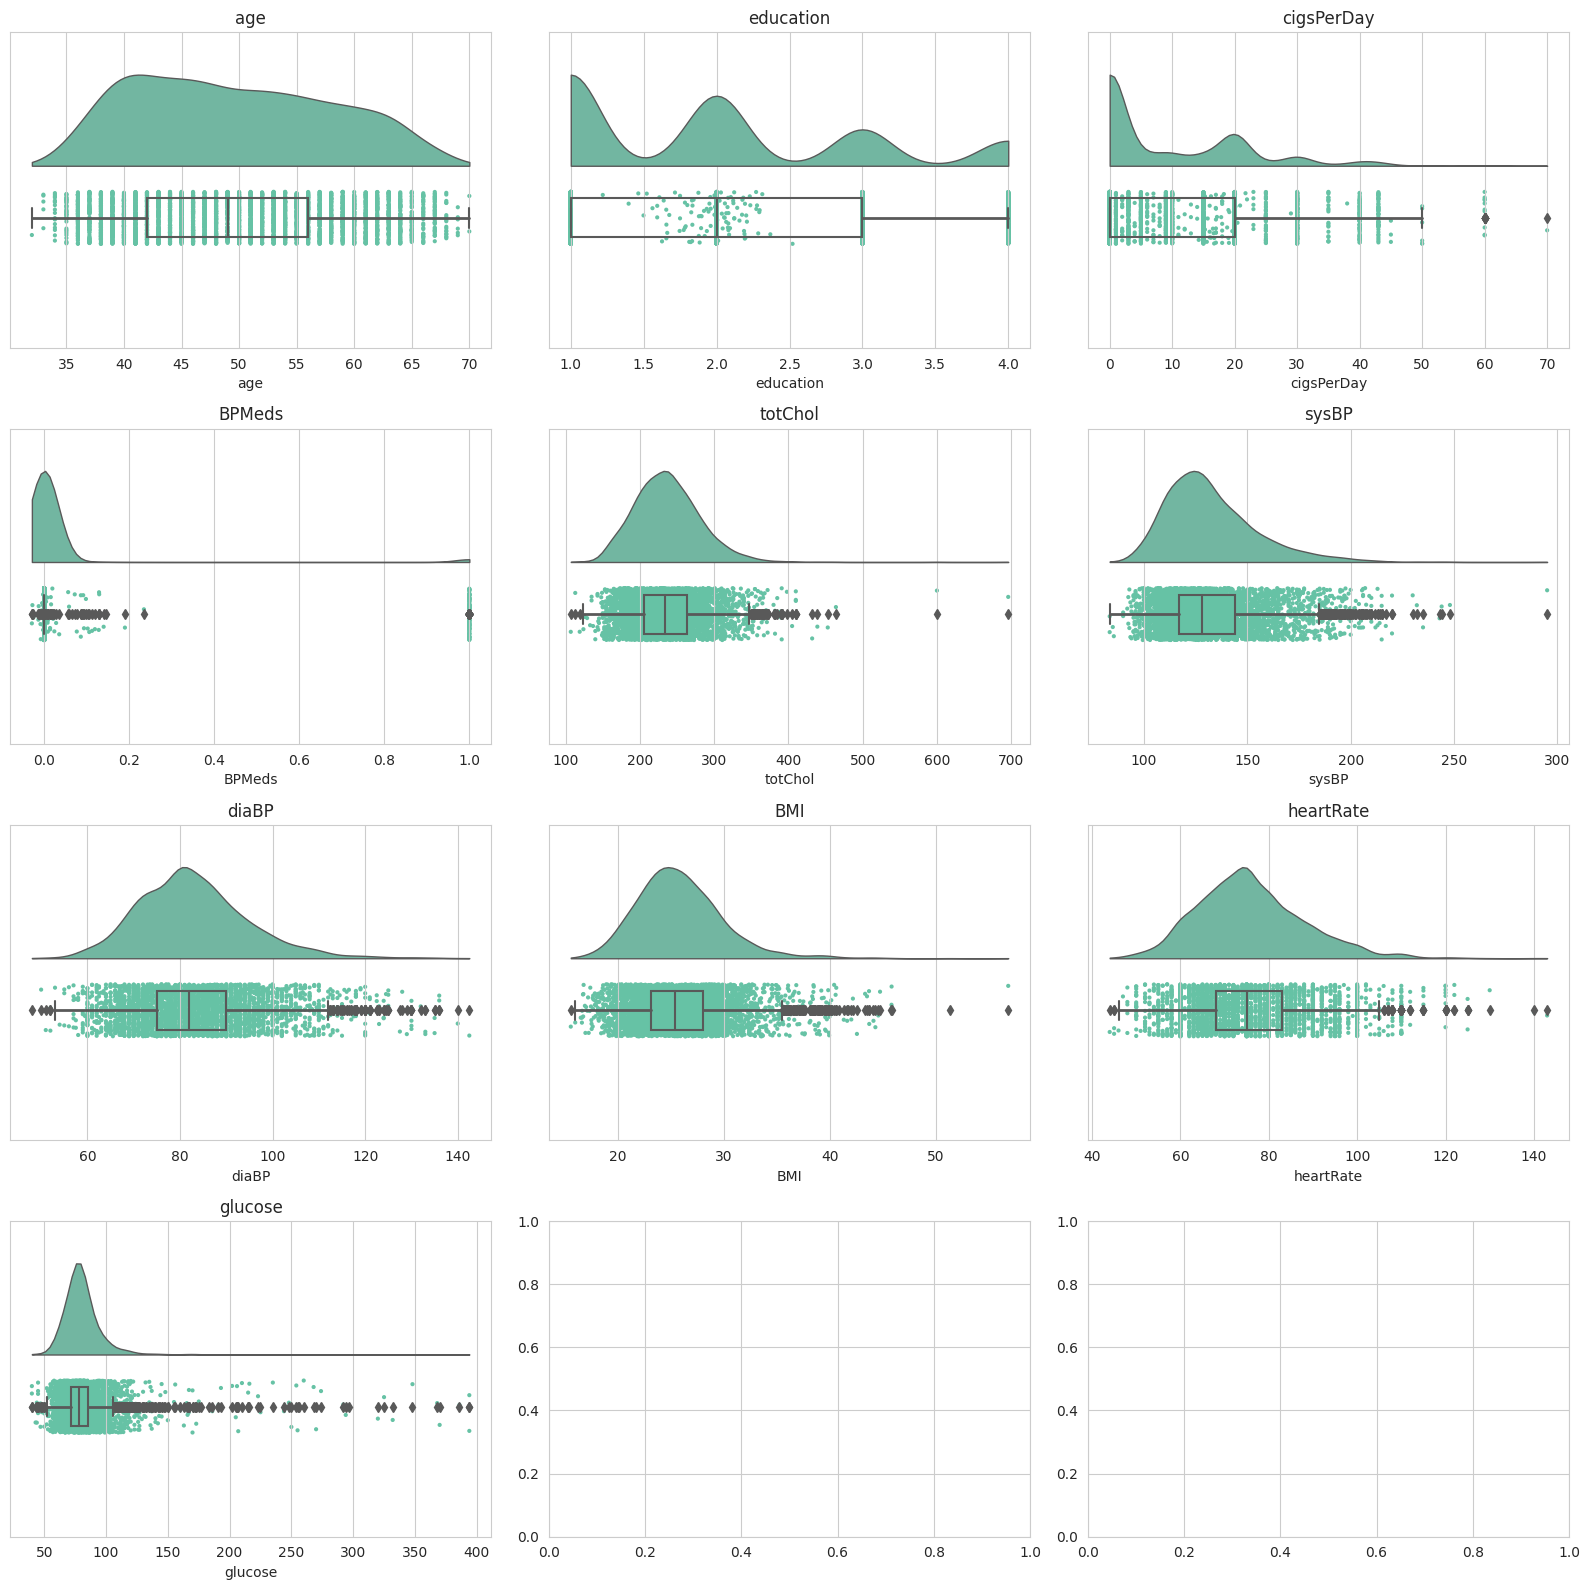

In [ ]:
variables = df_num.columns[:10]

# Calcular el número de filas y columnas necesarias
num_filas = 4
num_columnas = len(variables) // num_filas + (len(variables) % num_filas > 0)

# Crear una figura con subgráficos para cada variable
fig, axs = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(16, 16))

# Aplanar la lista de ejes para iterar más fácilmente
axs_flat = axs.flatten()

# Iterar sobre las variables y crear un raincloud para cada una
for i, variable in enumerate(variables):
    ax = axs_flat[i]
    pt.RainCloud(data=df_num, y=variable, orient='h', ax=ax)
    ax.set_title(variable)

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

En estas gráficas podemos apreciar que hay prácticamente todas las variables tienen valores atípicos. Sin embargo, dado que puede ser información sensible para el estudio no se eliminarán por ahora.

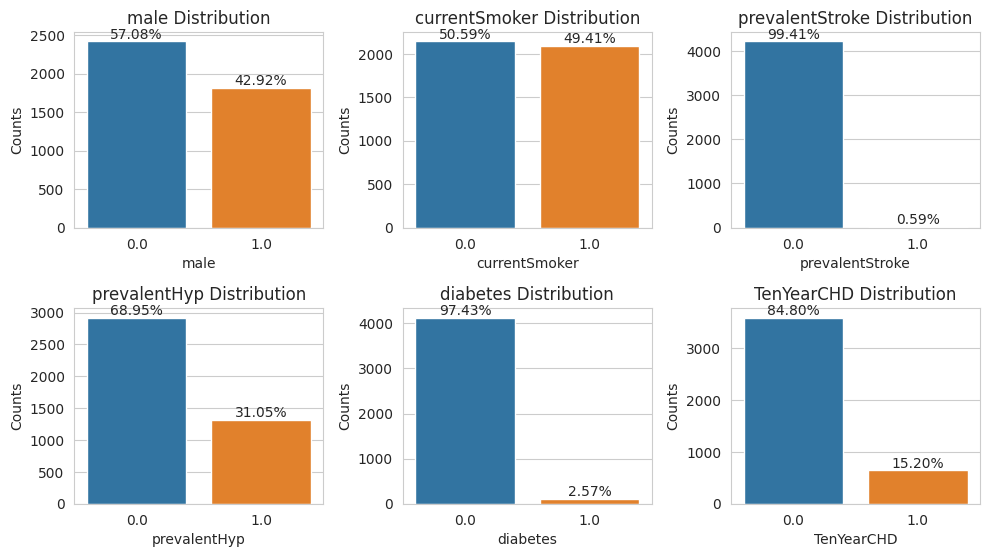

In [ ]:
# Visualización de los datos binarios

# Tamaño de la figura
plt.figure(figsize=(10, 8))

# Número de subgráficos por fila y columna
n_rows = 3
n_cols = 3

# Obtener el número total de columnas en el DataFrame
n_plots = len(df_binary.columns)

# Bucle para generar subgráficos
for i, col in enumerate(df_binary.columns, 1):
    # Establecer la posición del subgráfico en la cuadrícula
    plt.subplot(n_rows, n_cols, i)

    # Crear un gráfico de barras para la distribución de la columna binaria
    sns.countplot(data=df_binary, x=col)

    # Configurar etiquetas y título
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title(f'{col} Distribution')

    # Establecer las etiquetas del eje x para representar todas las categorías
    plt.xticks(range(len(df_binary[col].cat.categories)))

    # Añadir las proporciones a las columnas
    total = len(df_binary[col])
    for p in plt.gca().patches:  # Usar plt.gca() para obtener el eje actual
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2., height, f'{height/total:.2%}', ha="center", va="bottom")


plt.tight_layout()
# Save figure as a .png file
plt.savefig(f'{col}_distribution.png')
plt.show()




En esta visualización, como se venía comentando anteriormente, se pueden ver a simple vista el desbalanceo de los datos de algunas variables. A tener muy en cuenta posteriormente será la variable objetivo del modelo de aprendizaje automático: TenYearCHD.

## Análisis estadístico

### Estudio de las distribuciones de las variables numéricas

Se utilizará el test de Shapiro para comprobar dicha normalidad:

In [ ]:
# Crear una lista vacía para almacenar los DataFrames
result_dfs = []

# Recorrer cada variable y evaluar la normalidad
for columna in df_num.columns:
    datos = df_num[columna]

    # Realizar la prueba de Shapiro-Wilk
    estadistico, p_valor = stats.shapiro(datos)

    # Crear un DataFrame para el resultado de la prueba
    resultado_prueba_df = pd.DataFrame({
        'Variable': [columna],
        'Estadístico_de_Prueba_Shapiro': [estadistico],
        'Valor_P_de_Prueba_Shapiro': [p_valor],
        'Resultado_Prueba_Shapiro': ["Sigue una distribución normal" if p_valor > 0.05 else "No sigue una distribución normal"]
    })

    # Agregar el DataFrame a la lista
    result_dfs.append(resultado_prueba_df)

# Concatenar todos los DataFrames en la lista en un solo DataFrame
resultado_df = pd.concat(result_dfs, ignore_index=True)

# Mostrar el DataFrame de resultados
resultado_df

,Variable,Estadístico_de_Prueba_Shapiro,Valor_P_de_Prueba_Shapiro,Resultado_Prueba_Shapiro
0,age,0.97,0.00,No sigue una distribución normal
1,education,0.82,0.00,No sigue una distribución normal
2,cigsPerDay,0.77,0.00,No sigue una distribución normal
3,BPMeds,0.16,0.00,No sigue una distribución normal
4,totChol,0.97,0.00,No sigue una distribución normal
5,sysBP,0.94,0.00,No sigue una distribución normal
6,diaBP,0.97,0.00,No sigue una distribución normal
7,BMI,0.96,0.00,No sigue una distribución normal
8,heartRate,0.97,0.00,No sigue una distribución normal
9,glucose,0.55,0.00,No sigue una distribución normal


Como se puede comprobar, ninguna de las distribuciones sigue una distribución normal. La mayoría tienen una asimetría en la parte derecha tal y como se puede comprobar en la figura de la distribución de las variables.

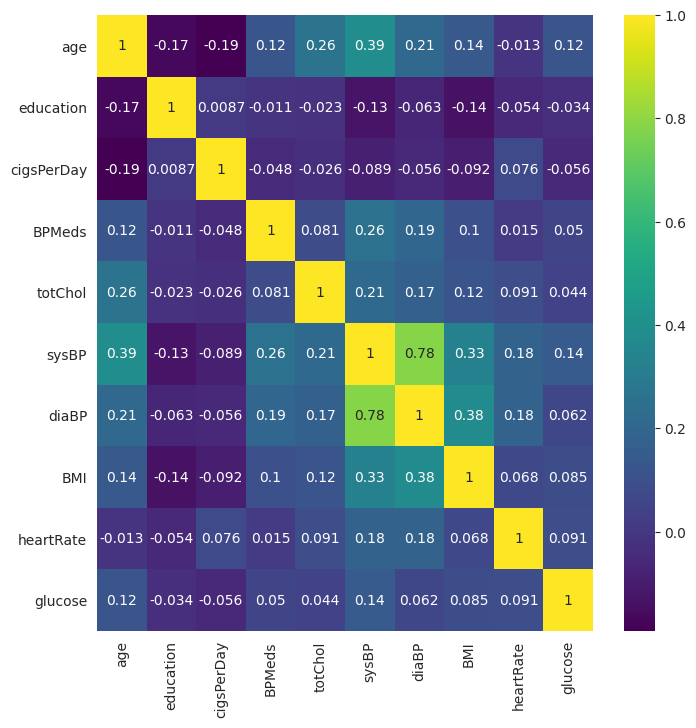

In [ ]:
# Visualizamos el mapa de correlación de las variables
fig = plt.figure(1, figsize=(8, 8))
sns.heatmap(df_num.corr(),annot=True, cmap='viridis')
plt.show()

Esta matriz de correlación no muestra ninguna asoaciación fuerte (>|0.9|). Por tanto, a la hora de eliminar variables, no podremos recurrir a la eliminación de variables muy relacionadas. Para ver también la correlación entre variables numéricas y binarias, así como entre binarias y binarias, se ampliará dicha matriz de correlación. Para ello, se utilizará correlación de Spearman entre variables numéricas (sin distribución normal), la de punto biserial entre numéricas y binarias y la chi cuadrado (normalizada para que sea un valor entre 0 y 1) entre binarias:

In [ ]:
pip install researchpy

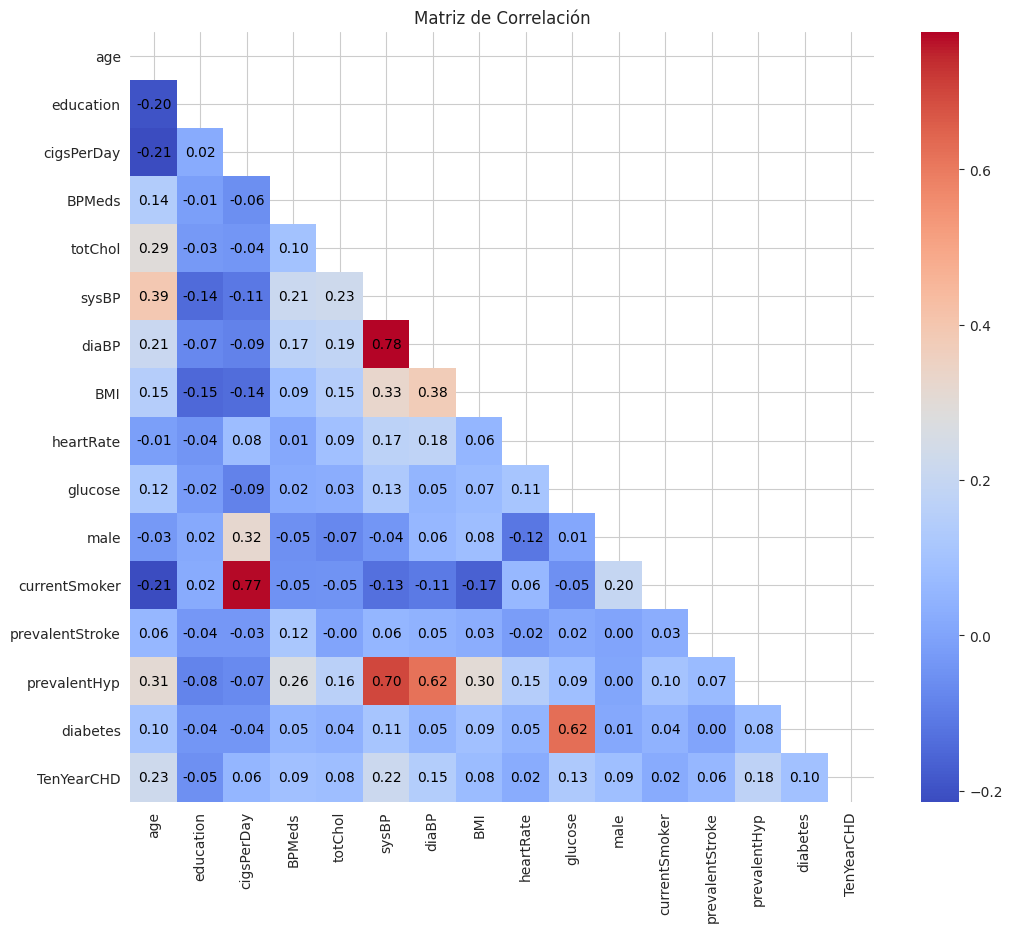

In [ ]:
# Crear una lista para almacenar los nombres de las variables
variables = list(df_num.columns) + list(df_binary.columns)

# Crear una matriz de correlación vacía
num_vars = len(variables)
correlation_matrix = np.zeros((num_vars, num_vars))

# Calcular la correlación de Spearman para variables numéricas
for i, col_num1 in enumerate(df_num.columns):
    for j, col_num2 in enumerate(df_num.columns):
        correlacion, _ = spearmanr(df_num[col_num1], df_num[col_num2])
        correlation_matrix[i, j] = correlacion

# Calcular la correlación de Spearman para pares numérico-binarios en ambas direcciones
for i, col_num in enumerate(df_num.columns):
    for j, col_bin in enumerate(df_binary.columns):
        if df_binary[col_bin].nunique() == 2:
            # Cambiar el test de punto biserial por el test de coeficiente de contingencia
            correlation, _ = pointbiserialr(df_num[col_num], df_binary[col_bin])
            correlation_matrix[i, j + len(df_num.columns)] = correlation
            correlation_matrix[j + len(df_num.columns), i] = correlation


# Calcular la correlación de chi-cuadrado para pares binarios-binarios
for i, col_bin1 in enumerate(df_binary.columns):
    for j, col_bin2 in enumerate(df_binary.columns):
        crosstab = pd.crosstab(df_binary[col_bin1], df_binary[col_bin2])
        chi2, p_value, dof, expected = chi2_contingency(crosstab)
        # Normalizar el chi-cuadrado
        correlation = np.sqrt(chi2 / len(df_binary))

        # Almacenar el valor normalizado como medida de correlación
        correlation_matrix[i + len(df_num.columns), j + len(df_num.columns)] = correlation

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 10))
# Crear una máscara para ocultar el triángulo superior de la matriz
mascara = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=False, xticklabels=variables, yticklabels=variables, cmap='coolwarm', mask=mascara)

# Mostrar los valores numéricos encima del mapa de calor
for i in range(num_vars):
    for j in range(num_vars):
        if not mascara[i, j]:
            texto = plt.text(j + 0.5, i + 0.5, f"{correlation_matrix[i, j]:.2f}", ha='center', va='center', color='black')

plt.title("Matriz de Correlación")
plt.show()



En esta matriz de correlación tampoco encontramos ninguna asoación muy fuerte.
Después de estudiar la matriz de correlación, podemos visualizar alguna de las asocaciones vistas anteriormente como la de sysBP y diaBP. También podemos incluir la TotChol para ver la asoación de los datos con la misma.

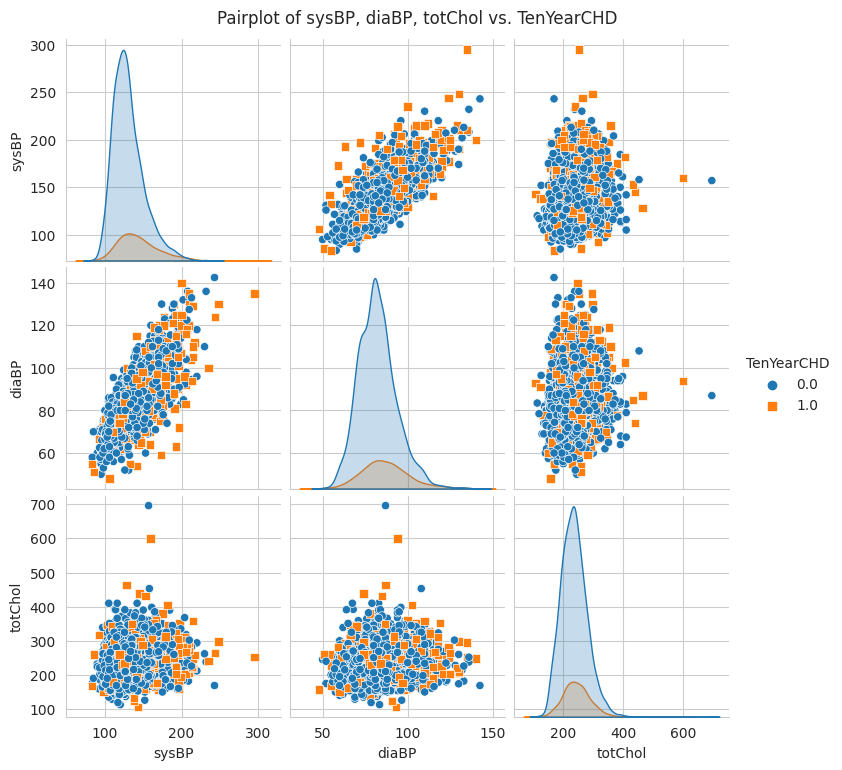

In [ ]:
# Creamos el pairplot
sns.pairplot(data=df_imputed, vars=['sysBP', 'diaBP', 'totChol'], hue='TenYearCHD', markers=["o", "s"])
plt.suptitle('Pairplot of sysBP, diaBP, totChol vs. TenYearCHD', y=1.02)
plt.show()

Como se puede comprobar, ambos valores de TenYearCHD tiene una distribución bastante similar en comparación con las variables del gráfico, aunque ya se deja ver el gran desbalanceo que existe en los datos de la variable objetivo.

# TAREA 4
## Realiza un análisis básico de selección de características siguiendo alguna de las técnicas vistas a lo largo del módulo que te permita obtener una submuestra depurada del dataset original.

Para este trabajo, se utilizará un modelo de regresión logística para averiguar las variables predictoras que no son estadísticamente significativas según sus valores de p-valor y así eliminarlas de conjunto de datos inicial al no aportar información para la predicción de la variable objetivo.

Esto se debe a que las variables predictoras con p-values altos (mayores a 0.05) en un modelo logístico pueden indicar que no tienen una relación estadísticamente significativa con la variable objetivo. Eliminar estas variables puede simplificar el modelo y mejorar su capacidad predictiva al centrarse en las características más relevantes.


In [ ]:
# Agregar una constante a las variables predictoras
df_constant = add_constant(df_imputed)

# Seleccionar las variables predictoras (X) excluyendo la variable de respuesta ('TenYearCHD')
X = df_constant.drop(columns=['TenYearCHD'])

# Crear un modelo de regresión logística con las variables predictoras y la variable de respuesta
model = sm.Logit(df_imputed.TenYearCHD, X)

# Ajustar el modelo utilizando el método de optimización BFGS
result = model.fit(method='bfgs', maxiter=1000, start_params=None)

# Mostrar un resumen de los resultados del modelo
result.summary()


Optimization terminated successfully.
         Current function value: 0.378372
         Iterations: 83
         Function evaluations: 92
         Gradient evaluations: 92


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4222
Method:                           MLE   Df Model:                           15
Date:                Wed, 17 Jan 2024   Pseudo R-squ.:                  0.1120
Time:                        15:42:29   Log-Likelihood:                -1603.5
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 7.961e-77
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.1620      0.666    -12.259      0.000      -9.467      -6.857
male                0.5072      0.100      5.048      0.000       0.310       0.704
age                 0.0621      0.006      9.978      0.000       0.050       0.074
education          -0.0129      0.046     -0.279      0.780      -0.104       0.078
currentSmoker       0.0187      0.145      0.129      0.898      -0.266       0.303
cigsPerDay          0.0209      0.006      3.627      0.000       0.010       0.032
BPMeds              0.2659      0.220      1.207      0.228      -0.166       0.698
prevalentStroke     0.9515      0.442      2.153      0.031       0.085       1.818
prevalentHyp        0.2349      0.129      1.827      0.068      -0.017       0.487
diabetes            0.0725      0.302      0.240      0.810      -0.519       0.664
totChol             0.0017      0.001      1.677      0.093      -0.000       0.004
sysBP               0.0139      0.004      3.907      0.000       0.007       0.021
diaBP              -0.0027      0.006     -0.457      0.648      -0.014       0.009
BMI                 0.0036      0.012      0.305      0.760      -0.020       0.027
heartRate          -0.0016      0.004     -0.419      0.675      -0.009       0.006
glucose             0.0078      0.002      3.565      0.000       0.004       0.012
===================================================================================
"""

A continuación, se creará una función para determinar las variables que son estadísticamente significativas para realizar la reducción de dimensionalidad.

In [ ]:
def extraer_columnas_significativas(X, dep_var, umbral=0.05):
    """
    Extrae columnas con un valor de p menor al umbral especificado del resumen de la regresión logística.

    Parámetros:
    - X: Variables independientes.
    - dep_var: Variable dependiente.
    - umbral: Umbral para el valor de p que se considera significativo.

    Retorna:
    - Lista de nombres de columnas con valores de p significativos.
    """

    # Ajusta el modelo de regresión logística
    modelo = sm.Logit(dep_var, X)
    resultado = modelo.fit(method='bfgs', maxiter=1000, start_params=None)
    # Extrae los valores de p del resumen
    valores_p = resultado.pvalues

    # Filtra las columnas según el umbral
    columnas_significativas = valores_p[valores_p < umbral].index.tolist()

    return columnas_significativas

# Añade una constante y elimina la variable dependiente de los datos
df_constante = sm.add_constant(df_imputed)
X = df_constante.drop(columns=['TenYearCHD'])

# Extrae las columnas significativas
columnas_significativas = extraer_columnas_significativas(X, df_imputed.TenYearCHD)

# Muestra las columnas significativas
print("Columnas significativas:")
print(columnas_significativas)




Optimization terminated successfully.
         Current function value: 0.378372
         Iterations: 83
         Function evaluations: 92
         Gradient evaluations: 92
Columnas significativas:
['const', 'male', 'age', 'cigsPerDay', 'prevalentStroke', 'sysBP', 'glucose']


# Modelo aprendizaje automático






# TAREA 5
## Partiendo de esta submuestra final, genera los grupos de entrenamiento y validación e imprime pos pantalla alguna características del mismo.

Para empezar, divideremos los datos en entrenamiento y test, utilizando la función 'train_test_split'. Para este trabajo, se considerá que test_size debe tener un total del 20% de los datos.
Además, dado que los datos de la variable objetivo (TenYearCHD) estan muy desbalanceados, se utilizará la técnica [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) para compensar dicho desbalanceo. Dentro de las opciones que tiene SMOTE, se eligirá que la clase minoritaria (0), se sobre muestree hasta llegar a ser un 90% del tamaño de la clase mayoritaria original. Un desbalanceo pequeño es aceptable para un modelo de aprendizaje automático y ayuda a no mostrear de más la clase minoritaria

In [ ]:
# Seleccionamos las características con las que entrenar nuestro modelo a
# partir de los resultados anteriores
s_feats = df_imputed[['age','male','cigsPerDay','prevalentStroke','sysBP','glucose','TenYearCHD']]
X = s_feats.iloc[:,:-1]
y= s_feats.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=5)

# Aplica sobremuestreo utilizando SMOTE
smote = SMOTE(sampling_strategy= 0.9 , random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("X train shape:", X_train.shape)
print("y train shape:", y_train.shape)
print("X train resambled shape:", X_resampled.shape)
print("Y train resambled shape:", y_resampled.shape)
print("X train shape:", X_test.shape)
print("y train shape:", y_test.shape)

X train shape: (3390, 6)
y train shape: (3390,)
X train resambled shape: (5494, 6)
Y train resambled shape: (5494,)
X train shape: (848, 6)
y train shape: (848,)


In [ ]:
# Imprime el recuento de cada clase después del sobremuestreo
print("Recuento de clases después del sobremuestreo:")
print(pd.Series(y_resampled).value_counts())

Recuento de clases después del sobremuestreo:
0.00    2892
1.00    2602
Name: TenYearCHD, dtype: int64


Se puede comprobar como, gracias a la librería SMOTE, se ha conseguido un sobre-muestreo de la variable minoritaria hasta llegar a un 90% del número inicial de la mayoritaria.


Debido a que la base de datos no es muy grande, se puede utilizar la librería ['lazypredict'](https://pypi.org/project/lazypredict/) para hacer una exploración de diferentes algoritmos de clasificación. Esta librería permite crear diferentes modelos en una sola línea de código y muestra finalmente sus resultados principales. Dado que varios modelos de clasificación necesitan los datos normalizados (como SVM, por ejemplo), se repetirá el paso anterior normalizando previamiente los datos:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

s_feats = df_imputed[['age','male','cigsPerDay','prevalentStroke','sysBP','glucose','TenYearCHD']]
# Rescalamos los datos teniendo en cuenta la media y desviación estándar de cada variable
# El método "fit" ajusta el modelo a los datos originales.
scaler.fit(s_feats.values)

# Utilizamos la función "transform" de la clase StandardScaler para aplicar
# la transformación a los datos originales. El resultado de esta transformación
# se almacena en la variable "X_scaled"
data_norm = pd.DataFrame(scaler.fit_transform(s_feats.values), columns=s_feats.columns)


# Convertir columnas a su tipo correcto
data_norm['male'] = df['male'].astype('category')
data_norm['prevalentStroke'] = data_norm['prevalentStroke'].astype('category')
df['TenYearCHD'] = df['TenYearCHD'].astype('category')
data_norm['TenYearCHD'] = data_norm['TenYearCHD'].astype('int')
data_norm.dtypes


age                 float64
male               category
cigsPerDay          float64
prevalentStroke    category
sysBP               float64
glucose             float64
TenYearCHD            int64
dtype: object

In [ ]:
X = data_norm.iloc[:,:-1]
y= data_norm.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=5)

# Aplica sobremuestreo utilizando SMOTE
smote = SMOTE(sampling_strategy= 0.9 , random_state=42)
X_resampled_norm, y_resampled_norm = smote.fit_resample(X_train, y_train)

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_resampled_norm, X_test, y_resampled_norm, y_test)
#print(models)

100%|██████████| 29/29 [00:25<00:00,  1.14it/s]

[LightGBM] [Info] Number of positive: 2602, number of negative: 2892
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 5494, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473608 -> initscore=-0.105668
[LightGBM] [Info] Start training from score -0.105668


In [ ]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.69               0.66     0.66      0.73   
CalibratedClassifierCV             0.69               0.66     0.66      0.73   
LogisticRegression                 0.69               0.66     0.66      0.73   
LinearDiscriminantAnalysis         0.69               0.65     0.65      0.72   
RidgeClassifierCV                  0.69               0.65     0.65      0.72   
RidgeClassifier                    0.69               0.65     0.65      0.72   
NearestCentroid                    0.68               0.65     0.65      0.72   
SVC                                0.66               0.65     0.65      0.70   
SGDClassifier                      0.67               0.64     0.64      0.71   
AdaBoostClassifier                 0.69               0.64     0.64      0.72   
Perceptron                  

# TAREA 6
## Instancia el modelo Scikit-learn de tu elección y aplícalo sobre los datos seleccionados para el entrenamiento.

###RandomForest Classification con datos imputados

Después de ver de forma general el desempeño de diferentes modelos de clasifición, se escogió el de RandomForest para hacer una exploración más exhaustiva.

Para construir este modelo, se empezará por una optimización de los hiperparámetros del modelo, ya que este contiene una gran cantidad de ellos (hasta 19). Para ello, se utilizará la función de 'BayesSearchCV' de la librería 'skopt'. Esta función utiliza la estadística bayesiana para estimar la distribución óptima de los hiperparámetros, siendo más apropiada que otros métodos de búsqueda como el Grid Search o Random Search dado que toma pasos informados de configuraciones previas para buscar el mejor set de parámetros.

A continuación, se seguirá con la búsqueda del mejor conjunto de hiperparámetros como se ha comentado anteriormente. En este trabajo, se buscarán optimizar los siguientes parámetros:

1.   **n_estimators**:  Número de árboles en el bosque.

2.   **max_depth**:  La profundidad máxima de cada árbol en el bosque.
3.   **criterion**: La función para medir la calidad de una división. Puede ser "gini" o "entropy". Gini se enfoca en la pureza de las clases, mientras que entropy se centra en la ganancia de información.
4.   **class_weight**: Ponderación de las clases en el modelo. Se utiliza para manejar desequilibrios en la distribución de clases. Asigna pesos diferentes a las clases para asegurar que el modelo preste más atención a las clases menos representadas.
5.   **max_samples**: Número o proporción de muestras utilizadas para entrenar cada árbol.
6.   **max_features**: Número máximo de características a considerar para hacer una división en un nodo.







In [ ]:
# definición de los parámetros
params = {
    "n_estimators": np.arange(50, 200, 25),
    "max_depth": np.arange(5, 15, 2),
    "criterion": ["gini", "entropy"],
    "class_weight" : ["balanced", "balanced_subsample"],
    "max_samples" : [0.3, 0.5, 0.8],
    'max_features': np.arange(0.1, 1, 0.1),

}

In [ ]:
# definición espacio de búsqueda
search = BayesSearchCV(
    estimator=RandomForestClassifier(),
    search_spaces=params,
    n_jobs=1,
    cv=3,
    n_iter=20,
    scoring="accuracy",
    verbose=4,
    random_state=42
)

In [ ]:
# búsqueda
search.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END class_weight=balanced, criterion=gini, max_depth=13, max_features=0.4, max_samples=0.5, n_estimators=100;, score=0.766 total time=   0.6s
[CV 2/3] END class_weight=balanced, criterion=gini, max_depth=13, max_features=0.4, max_samples=0.5, n_estimators=100;, score=0.873 total time=   0.6s
[CV 3/3] END class_weight=balanced, criterion=gini, max_depth=13, max_features=0.4, max_samples=0.5, n_estimators=100;, score=0.868 total time=   0.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=0.9, max_samples=0.8, n_estimators=50;, score=0.731 total time=   0.4s
[CV 2/3] END class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=0.9, max_samples=0.8, n_estimators=50;, score=0.824 total time=   0.3s
[CV 3/3] END class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=0.9, max_samples=0.8, n

BayesSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
              random_state=42, scoring='accuracy',
              search_spaces={'class_weight': ['balanced', 'balanced_subsample'],
                             'criterion': ['gini', 'entropy'],
                             'max_depth': array([ 5,  7,  9, 11, 13]),
                             'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                             'max_samples': [0.3, 0.5, 0.8],
                             'n_estimators': array([ 50,  75, 100, 125, 150, 175])},
              verbose=4)

In [ ]:
# Resultado del mejor modelo

print(search.best_score_)
print(search.best_params_)

0.8522153443405939
OrderedDict([('class_weight', 'balanced'), ('criterion', 'gini'), ('max_depth', 13), ('max_features', 0.5), ('max_samples', 0.8), ('n_estimators', 175)])


In [ ]:
# Ajusta el bosque aleatorio sin mostrar la advertencia

warnings.filterwarnings("ignore", category=UserWarning)
Model = RandomForestClassifier(n_estimators=175, class_weight= "balanced", criterion= 'gini', max_depth = 13, max_samples =  0.8, verbose = 0, max_features = 0.5)
Model.fit(X_resampled, y_resampled)

Model.score(X_test, y_test)

0.7936320754716981

De forma rápida, el modelo ya estaría creado para predecir nuevas entradas y comprobar diferentes métricas. ¿Pero es este el mejor árbol posible?

El mayor problema es que, siempre que utilizamos bosques aleatorios, creamos muchos más árboles de decisión de los necesarios.

En este modelo, la predicción final se genera agregando las predicciones de cada árbol de decisión individual e independiente. Como cada árbol de decisión en un bosque aleatorio es independiente, esto significa que cada árbol de decisión tendrá cierta precisión: algunos árboles de decisión serán de bajo rendimiento y otros de buen rendimiento.

Por ello, se puede buscar la precisión de cada árbol, ordenarlos y después empezar a construir los bosques, utilizando los árboles más precisos.

¿Cómo se puede hacer esto?

En primer lugar, entrenamos nuestro bosque aleatorio como lo haríamos habitualmente. A continuación, debemos calcular la precisión de cada modelo de árbol de decisión. En sklearn, se puede acceder a los árboles individuales con el atributo model.estimators_.

Así, iteramos sobre todos los árboles y calculamos su precisión en la prueba.

Crearemos "model_accs", una matriz NumPy que almacena el id del árbol y su precisión de prueba, por lo que podemos ordenar de mayor a menor precisión, ayudándonos a reorganizar los modelos de árboles de decisión en la lista model.estimators_ en orden decreciente de precisión de la prueba

Por último, crearemos la gráfica para ver cuál es el numero óptimo de modelos a utilizar:

[Fuente](https://www.blog.dailydoseofds.com/p/your-random-forest-is-underperforming)


In [ ]:
# Ajusta el bosque aleatorio sin mostrar la advertencia
warnings.filterwarnings("ignore", category=UserWarning)

#Creamos el modelo
Model = RandomForestClassifier(n_estimators=100, class_weight= "balanced", criterion= 'gini', max_depth = 13, max_samples =  0.8, verbose = 0, max_features = 0.5)
Model.fit(X_resampled, y_resampled)
Model.score(X_test, y_test)

#Creamos la lista para almacenar id y precisión
Model_accs=[]
for idx, tree in enumerate (Model.estimators_) :
	Score = tree.score(X_test, y_test) #encuentra precisión de cada árbol
	Model_accs.append([idx, Score])
Model_accs = np.array(Model_accs)

# Ordena según la segunda columna en orden inverso para obtener el orden de clasificación
sorted_indices = np.argsort(Model_accs[:, 1])[::-1]

# Obtiene la lista de IDs de modelo según las precisiones ordenadas del modelo
Model_ids = Model_accs[sorted_indices][:,0].astype(int)

# Crea un array numpy, reorganiza los modelos y convierte de nuevo a lista
Model.estimators_ = np.array(Model.estimators_)[Model_ids].tolist()

# Array para almacenar la puntuación acumulativa de modelos más pequeños
Result = []
Total_models = len(Model.estimators_)
for k in range (2, Total_models):
	Small_model = copy.deepcopy(Model) # Crea una copia del modelo actual
	# Establece sus árboles en los primeros 'k' árboles del modelo original
	Small_model.estimators_ = Model.estimators_[:k]
	# Calcula la puntuación del modelo más pequeño
	Score = Small_model.score(X_test, y_test)
	Result.append([k, Score])



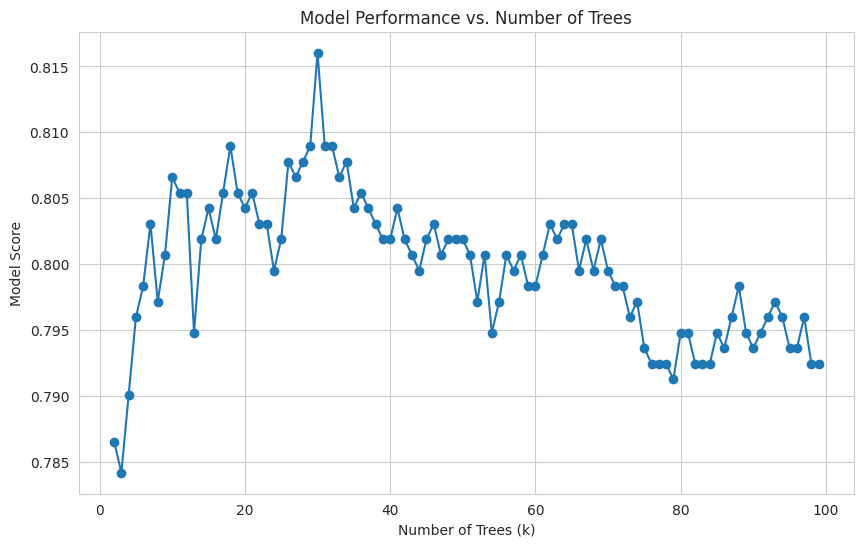

In [ ]:
# Extraer "k" y "Puntuación" de la lista de resultados
ks = [entry[0] for entry in Result]
scores = [entry[1] for entry in Result]

# Crea el gráfico
plt.figure(figsize=(10, 6))
plt.plot(ks, scores, marker='o', linestyle='-')
plt.title('Model Performance vs. Number of Trees')
plt.xlabel('Number of Trees (k)')
plt.ylabel('Model Score')
plt.grid(True)

# Muestra el código
plt.show()

In [ ]:
best_small_model = copy.deepcopy(Model)
#mostramos el score del mejor modelo de la gráfica
best_small_model.estimators_ = Model.estimators_[:30]
best_small_model.score(X_test, y_test)

0.8160377358490566

Como se puede comprobar, la precisión ha subido un poco más (de 0.79 a 0.816), pero se ha reducido muchísimo el número de árboles utilizados, bajando los requisitos computacionales.

# TAREA 7
## Calcula y muestra por pantalla información (métricas) sobre el desempeño del modelo frente al conjunto de validación.

In [ ]:
from sklearn.metrics import classification_report
# Realiza predicciones
y_pred = best_small_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       702
           1       0.45      0.33      0.38       146

    accuracy                           0.82       848
   macro avg       0.66      0.62      0.64       848
weighted avg       0.80      0.82      0.80       848



**Clase 0**:

Precision: 0.87 (87% de las predicciones positivas son correctas).

Recall: 0.92 (92% de las instancias positivas reales fueron clasificadas correctamente).

F1-score: 0.89 (un buen equilibrio entre precision y recall).


**Clase 1**:

Precision: 0.45 (45% de las predicciones positivas son correctas).

Recall: 0.33 (33% de las instancias positivas reales fueron clasificadas correctamente).

F1-score: 0.38 (valor más bajo, indicando un rendimiento menos óptimo).

**Reflexión**:
La clase 1 (la minoritaria) muestra un rendimiento inferior en comparación con la clase 0. Esto puede deberse a diferentes factores, pero cabría destacar:

1.   **Gran desbalanceo inicial**: Aunque técnicas como SMOTE ayudan a equilibrar la distribución de clases, no garantizan que la información sintética generada sea perfectamente representativa de la clase minoritaria. Puede haber casos en los que las instancias generadas no capturen completamente la variabilidad de la clase minoritaria.  
2.   **Posible dificultad intrínseca de la clase minoritaria**: Esto significa que las instancias de la clase minoritaria son intrínsecamente más difíciles de predecir porque pueden tener características más sutiles o menos patrones distintivos.



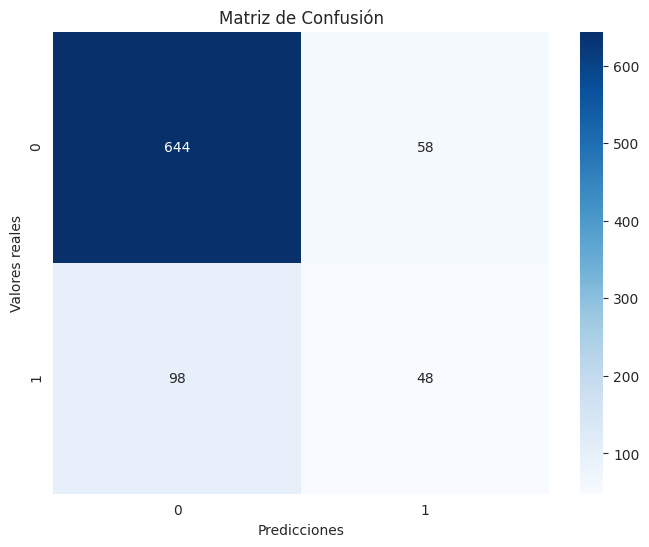

In [ ]:
from sklearn.metrics import confusion_matrix

# Obtén la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crea un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

**Verdaderos Negativos (TN)**: 644 instancias de la clase 0 fueron correctamente clasificadas como clase 0.

**Falsos Positivos (FP)**: 58 instancias de la clase 0 fueron incorrectamente clasificadas como clase 1.

**Falsos Negativos (FN)**: 98 instancias de la clase 1 fueron incorrectamente clasificadas como clase 0.

**Verdaderos Positivos (TP)**: 48 instancias de la clase 1 fueron correctamente clasificadas como clase 1.

Estos valores indican que el modelo tiene dificultades para identificar correctamente la clase minoritaria (Clase 1), ya que tanto la precisión como el recall son relativamente bajos. El rendimiento general del modelo puede considerarse subóptimo, especialmente en la clasificación de la clase minoritaria.

En situaciones de desbalance, es crucial evaluar el rendimiento utilizando métricas específicas para el desbalance, como precision y recall, en lugar de depender únicamente de la accuracy. Por tanto, estos valores nos indican que el modelo no es bueno identificando verdaderos positivos, y que tiene tendencia a dar falso negativos en su lugar.

La clasificación deficiente de la clase minoritaria (potencialmente la clase de casos positivos para enfermedades cardiovasculares) podría afectar la capacidad del modelo para identificar adecuadamente a aquellos en riesgo.

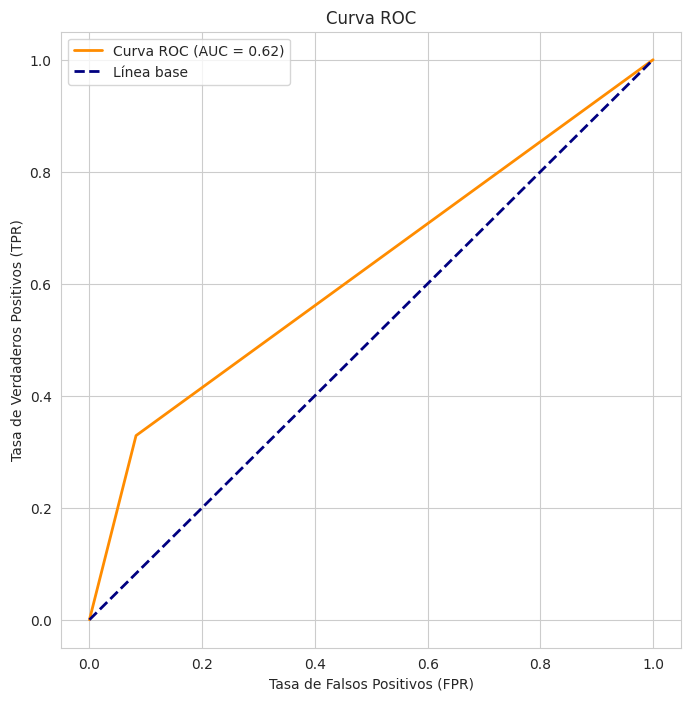

In [ ]:
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Obtén las probabilidades predichas
y_prob = best_small_model.predict(X_test)

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea base')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()


Un AUC de 0.62 sugiere un rendimiento modesto del modelo en términos de discriminación entre las clases.

## CONCLUSIÓN

El modelo creado desempeña una buena tarea identificando casos sin enfermadades coronarias a largo plazo, pero no tanto identicando casos positivos de enfermadad.
Por tanto, sería necesario seguir investigando cómo mejorar el modelo para que sea más preciso y con mayor especificidad. La principal razón puede deberse al gran desbalanceo de los datos, necesitando más instancias reales para poder apreciar mejor los patrones que tiene, ayudando en su identifación.


También puede deberse a que este proyecto no contiene información suficiente (suficiente número de variables) para determinar con exactitud si una persona sufrirá de enfermades coronarias en 10 años.


En lo que respecta a este trabajo, se podría seguir investigando como cambia el desempeño del modelo con diferentes técnicas de imputación (cambiar por la mediana o moda) o la eliminación de los datos nulos. También se podrían investigar otros métodos para estudiar las variables que tienen una significancia estadística para ayudar a predecir la variable objetivo, aumentando o disminuyendo las variables utilizadas en este trabajo.
Por último, se podrían seguir comparando diferentes modelos de aprendizaje automático hasta encontrar uno que tuviera mejores resultados generales.